In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt

In [2]:
n = pn.PointData()
n['a'] = np.arange(10)
n['b'] = np.arange(20).reshape(-1,2)

In [3]:
n

a,0,1,2,3,4,5,6,7,8,9
b,[0 1],[2 3],[4 5],[6 7],[8 9],[10 11],[12 13],[14 15],[16 17],[18 19]


In [4]:
g = pn.GridData()

In [5]:
g['a'] = np.arange(10)

adding default grid


In [6]:
np.array2string(np.arange(12), precision=2, threshold=6, edgeitems=3)

'[ 0  1  2 ...  9 10 11]'

In [7]:
g.grid

Grid(
Axis("x",
points = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
edges = edges: None)
nbins = 10),)

In [8]:
g['b'] = np.arange(30).reshape(10,-1)

In [9]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [10]:
g.flat('b')

masked_array(
  data=[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]],
  mask=False,
  fill_value=999999)

In [11]:
g.grid.size

10

In [12]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [13]:
g['b'].ndim

2

In [14]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

In [15]:
g = pn.GridData()

g['bw'] = np.average(img, axis=-1).T[:,::-1] / 255
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [16]:
g.grid.vars

['x', 'y']

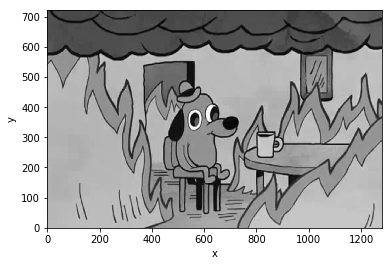

In [17]:
g.plot('bw', cmap='gray')

In [18]:
g.shape[3:]

()

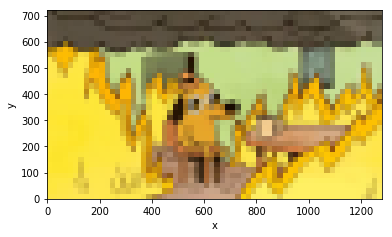

In [125]:
g.binwise(function=, x=0.05, y=0.05).plot('img')

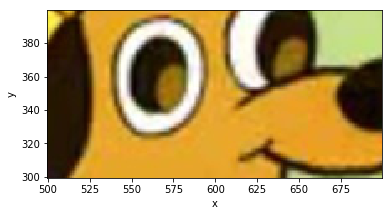

In [20]:
g[500:700, 300:400].plot('img')

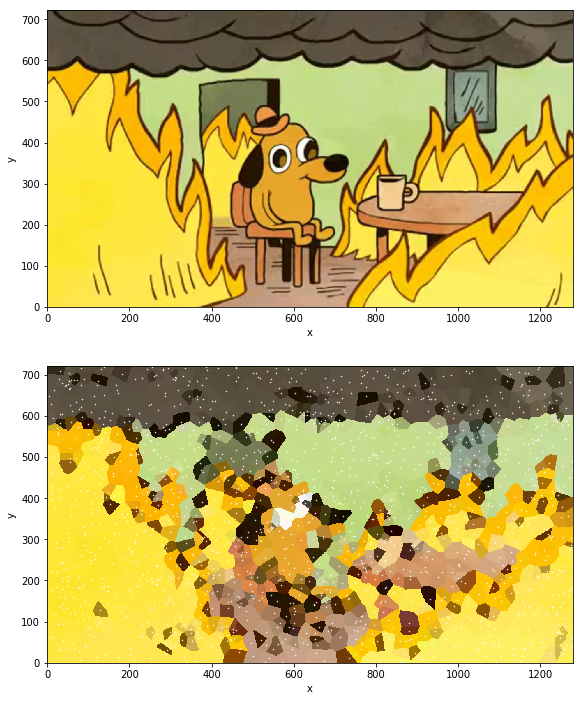

In [24]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges.max(), y=np.random.rand(N)*g.grid['y'].edges.max())
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='w', ax=ax[1], ms=1)

In [25]:
g.lookup(pd)

x,744,1.02e+03,931,55,832,735,...,1.11e+03,838,566,916,793,345
y,279,195,641,669,648,477,...,494,517,203,138,510,686
bw,0.61,0.325,0.282,0.288,0.254,0.728,...,0.746,0.725,0.382,0.739,0.732,0.307
img,[0.69 0.682 0.459],[0.592 0.314 0.071],[0.337 0.286 0.224],[0.333 0.298 0.231],[0.306 0.263 0.192],[0.773 0.871 0.541],...,[0.78 0.875 0.584],[0.769 0.867 0.541],[0.62 0.408 0.118],[0.969 0.871 0.376],[0.773 0.871 0.553],[0.353 0.318 0.251]


In [26]:
g.vars

['x', 'y', 'bw', 'img']

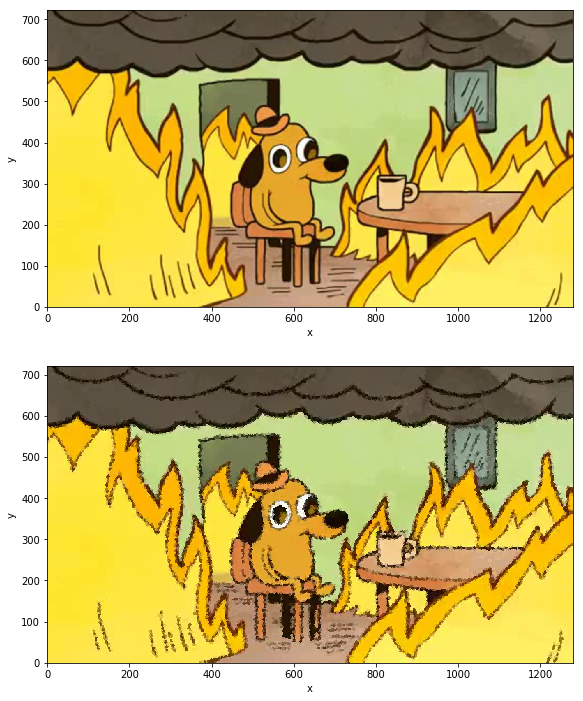

In [27]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=50000
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges.max()
pd['y'] = np.random.rand(N)*g.grid['y'].edges.max()
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


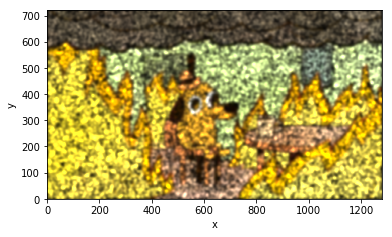

In [35]:
pk = pd.kde(x=1000, y=1000, bw=5, density=False, kernel='gaussian')
pk['img'] /= np.max(pk['img']) / 2
#pk['img_exp'] = np.exp(pk['img'])
#pk['img_exp'] /= np.max(pk['img_exp'])
pk.plot('img')

In [37]:
pk

y \ x,[0.064 1.344],[1.344 2.623],[2.623 3.903],[3.903 5.182],[5.182 6.461],[6.461 7.741],...,[1271.807 1273.086],[1273.086 1274.366],[1274.366 1275.645],[1275.645 1276.925],[1276.925 1278.204],[1278.204 1279.483]
[0.038 0.759],img = [0.152 0.137 0.042],img = [0.191 0.173 0.053],img = [0.227 0.206 0.063],img = [0.258 0.234 0.071],img = [0.281 0.255 0.078],img = [0.295 0.268 0.082],...,img = [0.296 0.279 0.114],img = [0.294 0.277 0.114],img = [0.282 0.266 0.109],img = [0.259 0.244 0.1 ],img = [0.227 0.214 0.088],img = [0.19 0.179 0.074]
[0.759 1.48 ],img = [0.171 0.155 0.047],img = [0.214 0.194 0.059],img = [0.254 0.23 0.07 ],img = [0.288 0.261 0.08 ],img = [0.313 0.283 0.086],img = [0.328 0.297 0.091],...,img = [0.323 0.304 0.125],img = [0.322 0.303 0.124],img = [0.309 0.291 0.119],img = [0.284 0.268 0.11 ],img = [0.25 0.236 0.097],img = [0.21 0.198 0.081]
[1.48 2.202],img = [0.19 0.172 0.052],img = [0.237 0.215 0.065],img = [0.281 0.254 0.078],img = [0.317 0.287 0.088],img = [0.344 0.311 0.095],img = [0.36 0.326 0.1 ],...,img = [0.348 0.328 0.134],img = [0.347 0.327 0.134],img = [0.334 0.314 0.129],img = [0.308 0.29 0.119],img = [0.273 0.257 0.105],img = [0.23 0.217 0.089]
[2.202 2.923],img = [0.209 0.189 0.058],img = [0.259 0.235 0.072],img = [0.306 0.277 0.085],img = [0.345 0.313 0.095],img = [0.374 0.338 0.103],img = [0.391 0.354 0.108],...,img = [0.371 0.35 0.143],img = [0.37 0.349 0.143],img = [0.357 0.336 0.138],img = [0.33 0.311 0.128],img = [0.293 0.276 0.113],img = [0.249 0.234 0.096]
[2.923 3.645],img = [0.226 0.205 0.062],img = [0.28 0.254 0.077],img = [0.331 0.299 0.091],img = [0.372 0.337 0.103],img = [0.402 0.364 0.111],img = [0.421 0.381 0.116],...,img = [0.392 0.37 0.151],img = [0.391 0.368 0.151],img = [0.377 0.355 0.146],img = [0.35 0.33 0.135],img = [0.312 0.294 0.121],img = [0.266 0.25 0.103]
[3.645 4.366],img = [0.242 0.219 0.067],img = [0.3 0.271 0.083],img = [0.353 0.319 0.097],img = [0.397 0.359 0.109],img = [0.428 0.388 0.118],img = [0.448 0.406 0.124],...,img = [0.41 0.387 0.158],img = [0.409 0.385 0.158],img = [0.395 0.372 0.153],img = [0.368 0.347 0.142],img = [0.329 0.31 0.127],img = [0.282 0.265 0.109]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
[717.164 717.885],img = [0.103 0.092 0.075],img = [0.121 0.109 0.088],img = [0.139 0.124 0.1 ],img = [0.155 0.138 0.111],img = [0.17 0.151 0.12 ],img = [0.184 0.162 0.128],...,img = [0.313 0.286 0.233],img = [0.274 0.25 0.204],img = [0.234 0.213 0.174],img = [0.194 0.176 0.144],img = [0.156 0.142 0.116],img = [0.121 0.111 0.09 ]
[717.885 718.607],img = [0.096 0.086 0.07 ],img = [0.113 0.101 0.082],img = [0.129 0.115 0.093],img = [0.144 0.128 0.103],img = [0.157 0.14 0.111],img = [0.17 0.15 0.117],...,img = [0.303 0.276 0.225],img = [0.265 0.242 0.197],img = [0.226 0.206 0.168],img = [0.187 0.17 0.139],img = [0.15 0.136 0.111],img = [0.116 0.106 0.086]
[718.607 719.328],img = [0.087 0.078 0.063],img = [0.103 0.092 0.075],img = [0.118 0.105 0.085],img = [0.131 0.117 0.093],img = [0.143 0.127 0.101],img = [0.154 0.136 0.106],...,img = [0.29 0.264 0.215],img = [0.254 0.231 0.189],img = [0.216 0.197 0.161],img = [0.179 0.163 0.133],img = [0.143 0.13 0.106],img = [0.11 0.1 0.082]


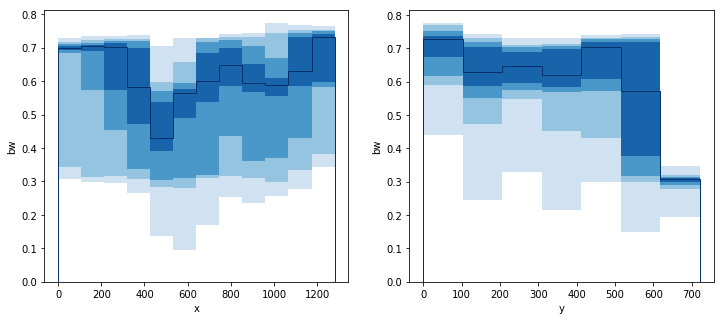

In [38]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

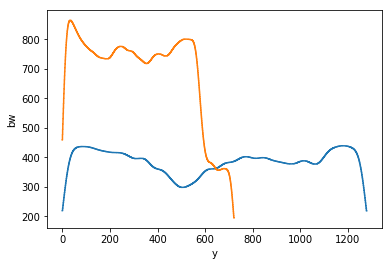

In [39]:
#g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')
g.kde(x=1000, density=False).plot('bw')
g.kde(y=1000, density=False).plot('bw')

In [40]:
g['img'].shape

(1280, 722, 3)

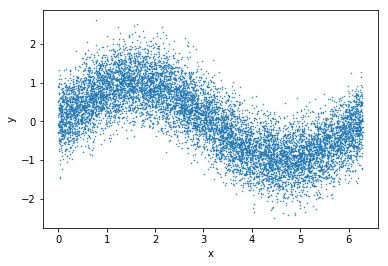

In [41]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(p.array_shape[0]) * 0.5
p.plot('.', ms=1)

In [42]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

IndexError: No variable counts in DataSet

IndexError: No variable density in DataSet

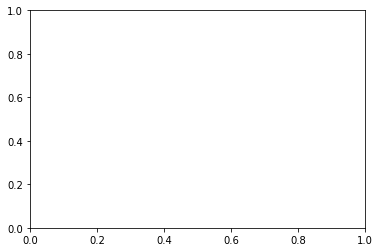

In [43]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

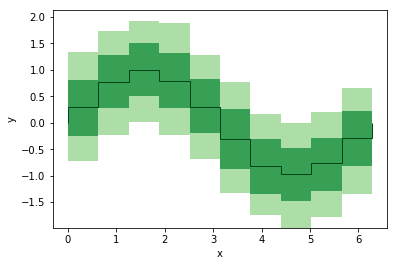

In [44]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

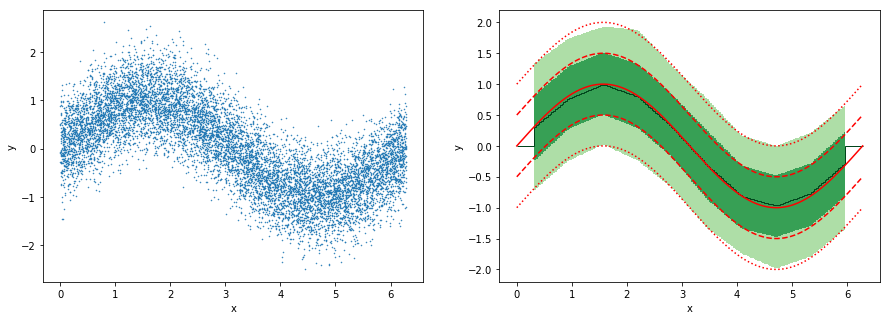

In [45]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='linear', fill_value=np.nan).plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

In [46]:
p.binwise(method='mean', x=1000).plot('y', alpha=0.3)
p.binwise(method='mean', x=20).plot('y')
p.binwise(method='mean', x=20).interp(method='cubic', x=1000).plot('y')

TypeError: 'NoneType' object is not callable

In [47]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

needs to be checked, is weird behaviour
needs to be checked, is weird behaviour


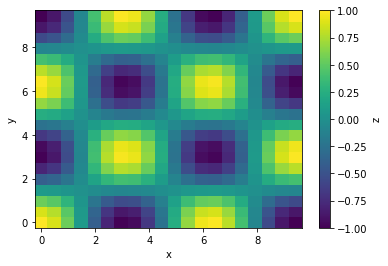

In [48]:
s.plot(cbar=True)

In [49]:
s['z']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.879,0.547,0.0826,-0.402,-0.789,...,0.789,0.402,-0.0826,-0.547,-0.879,-1
0.496,0.879,0.773,0.481,0.0726,-0.353,-0.694,...,0.694,0.353,-0.0726,-0.481,-0.773,-0.879
0.992,0.547,0.481,0.299,0.0452,-0.22,-0.432,...,0.432,0.22,-0.0452,-0.299,-0.481,-0.547
1.49,0.0826,0.0726,0.0452,0.00682,-0.0332,-0.0652,...,0.0652,0.0332,-0.00682,-0.0452,-0.0726,-0.0826
1.98,-0.402,-0.353,-0.22,-0.0332,0.161,0.317,...,-0.317,-0.161,0.0332,0.22,0.353,0.402
2.48,-0.789,-0.694,-0.432,-0.0652,0.317,0.623,...,-0.623,-0.317,0.0652,0.432,0.694,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.789,0.694,0.432,0.0652,-0.317,-0.623,...,0.623,0.317,-0.0652,-0.432,-0.694,-0.789
7.44,0.402,0.353,0.22,0.0332,-0.161,-0.317,...,0.317,0.161,-0.0332,-0.22,-0.353,-0.402
7.94,-0.0826,-0.0726,-0.0452,-0.00682,0.0332,0.0652,...,-0.0652,-0.0332,0.00682,0.0452,0.0726,0.0826


In [50]:
np.max(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,1,0.879,0.547,0.0826,0.402,0.789,...,0.789,0.402,0.0826,0.547,0.879,1


In [51]:
np.square(s['z'])

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.773,0.299,0.00682,0.161,0.623,...,0.623,0.161,0.00682,0.299,0.773,1
0.496,0.773,0.598,0.231,0.00527,0.125,0.482,...,0.482,0.125,0.00527,0.231,0.598,0.773
0.992,0.299,0.231,0.0895,0.00204,0.0483,0.186,...,0.186,0.0483,0.00204,0.0895,0.231,0.299
1.49,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682
1.98,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
2.48,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
7.44,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
7.94,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682


In [52]:
np.sum(s['z'], axis='y')

x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-5.55e-16,-6.66e-16,0,0,5.55e-17,7.77e-16,...,-2.22e-16,-2.22e-16,4.16e-17,4.44e-16,6.66e-16,5.55e-16


In [53]:
np.mean(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [54]:
s['z'].mean(axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [55]:
s['x']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.496,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.992,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.49,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.98,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
2.48,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.44,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42


In [56]:
test = pn.GridData()#x=[0,1,2], y=[0,1,2,3])

In [57]:
test['a'] = np.arange(6).reshape(2,3)
test['b'] = np.zeros_like(test['a'])

adding default grid


In [58]:
test

y \ x,0,1
0,a = 0b = 0,a = 3b = 0
1,a = 1b = 0,a = 4b = 0
2,a = 2b = 0,a = 5b = 0


In [59]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [60]:
test['a'].T

x \ y,0,1,2
0,0,1,2
1,3,4,5


In [61]:
np.mean(test['a'], axis='x')

y,0,1,2
,1.5,2.5,3.5


In [62]:
np.sum(test['b'], axis='x')

y,0,1,2
,0,0,0


In [63]:
np.square(test['a'])

y \ x,0,1
0,0,9
1,1,16
2,4,25


In [64]:
np.max(test['a'], axis='x')

y,0,1,2
,3,4,5


In [65]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [66]:
test['a'][test['x'] > 1]

y \ x,0,1
0,--,--
1,--,--
2,--,--


In [67]:
test.grid['x'].edges

edges: array([[-0.5,  0.5],
       [ 0.5,  1.5]])

In [68]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [69]:
test['a'][test['x'] >= test['y']] + test['a']

y \ x,0,1
0,0,6
1,--,8
2,--,--


In [70]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [71]:
#(test['a'] + 
(test['a'][test['x'] == test['y']])

y \ x,0,1
0,0,--
1,--,4
2,--,--


In [72]:
np.sum(test['a'][test['x'] == test['y']])

4

In [73]:
test['a'] + test['a'][test['a'] > 3] * 3.

y \ x,0,1
0,--,--
1,--,16
2,--,20


In [74]:
test['a'][test['a'] > 3] += test['a'][test['a'] > 4] 

In [75]:
test['a'] *= -1

In [76]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [80]:
test['a'][0,:] *= -1

In [81]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [82]:
(test['a'].data * 300)

array([[    0,  -300,  -600],
       [ -900, -1200, -3000]])

In [83]:
test['a'] ** 2

y \ x,0,1
0,0,9
1,1,16
2,4,100


In [84]:
str(test['a'][0])
test['a'][0].shape
test['a'].ndim

2

In [85]:
test['a'].grid[0]

Grid(
Axis("y",
points = array([0, 1, 2]),
edges = edges: None)
nbins = 3),)

In [86]:
test['a'][0,[0]]

y,0
,0


In [87]:
test[0,0]

{'a': 0, 'b': 0}

In [88]:
test['a'].data[[0],[0],np.newaxis]

array([[0]])

In [89]:
np.std(test['a'], axis='x')

y,0,1,2
,1.5,1.5,4


In [90]:
np.sum(test['a'])

-20

In [91]:
l = np.arange(10)

In [92]:
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
mask = l > 5

In [94]:
mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [95]:
['%s'%s for s in np.asanyarray(np.ma.MaskedArray(l, mask))]

['0', '1', '2', '3', '4', '5', '--', '--', '--', '--']

In [96]:
ma = np.ma.MaskedArray(l, mask)

In [97]:
(-np.ones(10) * np.asanyarray(ma)).data

array([-0., -1., -2., -3., -4., -5., -1., -1., -1., -1.])

In [98]:
np.array(ma) * -1

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [99]:
np.asarray(ma)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
np.asanyarray(ma)

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [104]:
ma.mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [105]:
np.sum(test['a'])

-20

In [106]:
np.sum(ma)

15

In [107]:
ma

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [108]:
axis = (1,)

In [109]:
axis

(1,)

In [110]:
axis[0] = 3

TypeError: 'tuple' object does not support item assignment

In [ ]:
any(sorted((1,4,3)) < 3)

In [108]:
np.arange(12)[:,np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [113]:
np.arange(12)[:,np.newaxis] @ np.arange(12)[:,np.newaxis].T

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]])

In [122]:
blah=33.000
f'ldasdhadh {blah:.2g} {blah}'

'ldasdhadh 33 33.0'

In [124]:
'test %ff'%{ff:33}

NameError: name 'ff' is not defined